# Install required Libraries

### synapseclient
>  synapseclient is a library which is used to access data from Synapse database directly.




In [ ]:
!pip install synapseclient

     |████████████████████████████████| 153kB 5.0MB/s 
     |████████████████████████████████| 2.3MB 16.1MB/s 
  Created wheel for synapseclient: filename=synapseclient-1.9.4-cp36-none-any.whl size=159110 sha256=396e06baa36a2af56e41b6be4368e7d17f657d4c0872fdd82e7e7a0a788479dd
  Stored in directory: /root/.cache/pip/wheels/81/c9/4c/f389598a0bd020907d8a36abedb4805e1dc49c5d88dde2fd01
  Created wheel for secretstorage: filename=SecretStorage-2.3.1-cp36-none-any.whl size=13958 sha256=288ce33ad5933e58410e53eb92f5a87d60ca3687445f4478f18d9d19a107e210
  Stored in directory: /root/.cache/pip/wheels/4e/5b/1b/be8c8a830a0243af85b2946a0aece2c6743d7f7f946977ed67
Successfully built synapseclient secretstorage


In [ ]:
!pip install aubio

     |████████████████████████████████| 481kB 8.3MB/s 
  Created wheel for aubio: filename=aubio-0.4.9-cp36-cp36m-linux_x86_64.whl size=386233 sha256=ce20d391d9d71c89d34d39a74ed3d0126f2bdc40182ba5de5963d4b4a6c7c3e6
  Stored in directory: /root/.cache/pip/wheels/ac/93/da/33a0041dff56d6c1faf82c83ff487cf669442b7087db20a995
Successfully built aubio


In [ ]:
!pip install Avpy

     |████████████████████████████████| 112kB 8.4MB/s 
  Created wheel for Avpy: filename=Avpy-0.1.3-cp36-none-any.whl size=106848 sha256=fec220325aca72709c251769b73a64f2cc6e52c603ca8d40ad3f3661209f1f27
  Stored in directory: /root/.cache/pip/wheels/7a/53/b9/919a80c29b516914b28cde442eb74859507f3b135918c4b72c
Successfully built Avpy


### pydub


> pydub library is used to export .m4a audio file to .wav audio files.


In [ ]:
!pip install pydub

### praat-parselmouth

> praat-parselmouth library is used to extract required features from audio files.

In [ ]:
!pip install praat-parselmouth

     |████████████████████████████████| 9.0MB 100kB/s 


### librosa


> praat-parselmouth library is used to extract required features from audio files.



In [ ]:
!pip install librosa

#Audio File download and Coversion  


In [ ]:
from synapseutils import notifyMe
import synapseclient
from synapseclient import Activity
from synapseclient import Entity, Project, Folder, File, Link
from synapseclient import Evaluation, Submission, SubmissionStatus
from synapseclient import Wiki
import os
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv

import parselmouth
from parselmouth.praat import call
from parselmouth import MFCC
import glob
import os.path
from pydub import AudioSegment
import warnings
warnings.filterwarnings('ignore')


### Login to Synapse database 

In [ ]:
syn = synapseclient.Synapse()
syn.login('username', 'password')

Welcome, Tejaswini Kale!



In [ ]:
entity = syn.get('syn5511444')
entity = syn.get('syn5511444', downloadLocation='/content/drive/My Drive/Audio')
print(entity.name)
# print(entity.path)


Voice Activity


###Fetch Audio File 

1.   Audio files are extracted from syn5511444 table.

2.   Other realted information about people participated is extracted from syn511429 table.
3.   Using data frame to store information extracted from tables
4. As data is in two different dataframes, we used merged with inner join on healthCode which act as unique key for each participant to combine two dataframes.

In [ ]:
def downloadAll():
  results = syn.tableQuery("SELECT  * FROM syn5511444 ")
  demographic = syn.tableQuery('SELECT* FROM syn5511429')
  df=results.asDataFrame(rowIdAndVersionInIndex=True)
  df.set_index(['recordId'], inplace = False) 
  demographicdf=demographic.asDataFrame(rowIdAndVersionInIndex=True)
  colList=['healthCode','professional-diagnosis','age','gender']
  demographicdf=demographicdf[colList]
  mergedDf = pd.merge(df, demographicdf, how='inner', on=['healthCode'])
  mergedDf = mergedDf.set_index("audio_audio.m4a", drop = False)
  return mergedDf


In [ ]:
downloadAll()

,recordId,healthCode,createdOn,appVersion,phoneInfo,audio_audio.m4a,audio_countdown.m4a,medTimepoint,professional-diagnosis,age,gender
audio_audio.m4a,,,,,,,,,,,
5404521,177d6c17-6635-4884-8481-a671fca06266,639e8a78-3631-4231-bda1-c911c1b169e5,1425904701000,"version 1.0, build 7",iPhone 6,5404521,5404533,I don't take Parkinson medications,False,24.0,Male
5410381,d59f922b-3ab9-4105-be30-4c2c481e99ed,52fe366a-2a9f-4260-9fb1-0fbc637a6cf4,1425926292000,"version 1.0, build 7",iPhone 5s (GSM),5410381,5410398,I don't take Parkinson medications,False,38.0,Female
5773552,5c3b56ea-2a8a-4a9b-9d04-271928ff7044,52fe366a-2a9f-4260-9fb1-0fbc637a6cf4,1426297608000,"version 1.0, build 7",iPhone 5s (GSM),5773552,5773599,I don't take Parkinson medications,False,38.0,Female
5805736,9a3d4bd0-a6a6-4218-a442-4bdf4785e953,52fe366a-2a9f-4260-9fb1-0fbc637a6cf4,1426297632000,"version 1.0, build 7",iPhone 5s (GSM),5805736,5805781,I don't take Parkinson medications,False,38.0,Female
5390859,0e85415c-75ee-45d2-8d38-ac7b2c8c5c50,67bdd316-26fc-4fc7-8431-bf9f41a649dd,1425926706000,"version 1.0, build 7",iPhone 6 Plus,5390859,5390881,I don't take Parkinson medications,False,32.0,Male
...,...,...,...,...,...,...,...,...,...,...,...
6092095,341bddb3-7861-4c83-ac4a-04ba1ffe9b59,a11611b4-6a24-4f6c-ae18-d93b849ef188,1441831411000,"version 1.1, build 22",iPhone 6,6092095,6092122,I don't take Parkinson medications,False,73.0,Male
6091540,68767b8b-bf07-43ec-8547-c9858529bb42,a11611b4-6a24-4f6c-ae18-d93b849ef188,1441837503000,"version 1.1, build 22",iPhone 6,6091540,6091577,I don't take Parkinson medications,False,73.0,Male
6092590,ed309a5b-3784-4750-9dc5-d803f751476c,1c9d0333-b4ac-474d-ac87-f7941fb02443,1441841339000,"version 1.1, build 22",iPhone 5 (GSM),6092590,6092609,I don't take Parkinson medications,False,20.0,Female


### Download Audio Files


> We can not directly download audio files from table, we get unique id for each audio file from table and following code will download actual audio files.


> This code will return dictionary with unique values of audio file as key and download location as values for key.

### Changing Extension of Downloaded Audio files 


> Downloaded audio files have extension as .tmp which can not be used as directly.


> Original format of file is .m4a thus can not be directly converted to .wav file, thus had to rename to change extension to m4a first.




In [ ]:
def dowloadByRecordId(recordId):
   results = syn.tableQuery("SELECT  * FROM syn5511444 where recordId ="+"'"+recordId+"'")
   downloadLoc=syn.downloadTableColumns(results,"audio_audio.m4a")
   keys=downloadLoc.keys()
   for i in keys:
      os.rename(downloadLoc.get(i), i +'.m4a')
      return os.getcwd()+"/"+ i +'.m4a'


### Export as '.wav' File


> For feature extration from audio file we are using Librosa and Praat library which takes only .wav audio file as input thus, need to export all .m4a audio files to .wav files using library pydub.



In [ ]:
def covertToWav (location):
  try:
    base=os.path.splitext(location)[0]
    sound = AudioSegment.from_file(location, format="m4a")
    file_handle = sound.export(base+".wav", format="wav")
    return  base+".wav"
  except:
    print()
    #os.remove(location)


###Get Audio features from Librosa Library
> chroma_stft : 

In [ ]:
def librosaMeasures(y,sr):
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rmse(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    return chroma_stft, rmse, spec_cent ,spec_bw ,rolloff ,zcr,mfcc

In [ ]:
def pitchHrnMeasures(f0min,f0max,unit):
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max) #create a praat pitch object
    pitchMean = call(pitch, "Get mean", 0, 0, unit) # get mean pitch
    PitchStdev = call(pitch, "Get standard deviation", 0 ,0, unit) # get standard deviation
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, f0min, 0.1, 1.0)
    hnr = call(harmonicity, "Get mean", 0, 0)
    return pitchMean, PitchStdev, hnr


In [ ]:
def jitterShimmerMeasures(sound,pointProcess):
    localJitter = call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
    localabsoluteJitter = call(pointProcess, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3)
    rapJitter = call(pointProcess, "Get jitter (rap)", 0, 0, 0.0001, 0.02, 1.3)
    ppq5Jitter = call(pointProcess, "Get jitter (ppq5)", 0, 0, 0.0001, 0.02, 1.3)
    ddpJitter = call(pointProcess, "Get jitter (ddp)", 0, 0, 0.0001, 0.02, 1.3)
    localShimmer =  call([sound, pointProcess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    localdbShimmer = call([sound, pointProcess], "Get shimmer (local_dB)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    apq3Shimmer = call([sound, pointProcess], "Get shimmer (apq3)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    aqpq5Shimmer = call([sound, pointProcess], "Get shimmer (apq5)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    apq11Shimmer =  call([sound, pointProcess], "Get shimmer (apq11)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    ddaShimmer = call([sound, pointProcess], "Get shimmer (dda)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    return localJitter ,localabsoluteJitter ,rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer

In [ ]:
def formantMeasures(sound,pointProcess):
    formants = call(sound, "To Formant (burg)", 0.0025, 5, 5000, 0.025, 50)
    numPoints = call(pointProcess, "Get number of points")
    f1_list = []
    f2_list = []
    f3_list = []
    f4_list = []
    
    # Measure formants only at glottal pulses
    for point in range(0, numPoints):
        point += 1
        t = call(pointProcess, "Get time from index", point)
        f1 = call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
        f2 = call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
        f3 = call(formants, "Get value at time", 3, t, 'Hertz', 'Linear')
        f4 = call(formants, "Get value at time", 4, t, 'Hertz', 'Linear')
        f1_list.append(f1)
        f2_list.append(f2)
        f3_list.append(f3)
        f4_list.append(f4)
    
    f1_list = [f1 for f1 in f1_list if str(f1) != 'nan']
    f2_list = [f2 for f2 in f2_list if str(f2) != 'nan']
    f3_list = [f3 for f3 in f3_list if str(f3) != 'nan']
    f4_list = [f4 for f4 in f4_list if str(f4) != 'nan']
    
    # calculate mean formants across pulses
    f1_mean = np.mean(f1_list)
    f2_mean = np.mean(f2_list)
    f3_mean = np.mean(f3_list)
    f4_mean = np.mean(f4_list)
    return f1_mean,f2_mean,f3_mean,f4_mean


#Feature Extraction

In [ ]:
f0min,f0max=70,600
unit="Hertz"
header = 'lable audioId recordId healthCode age gender time pitchMean pitchStdev hnr chroma_stft rmse spectral_centroid spectral_bandwidth rolloff localJitter localabsoluteJitter rapJitter ppq5Jitter ddpJitter localShimmer localdbShimmer aqpq5Shimmer apq11Shimmer ddaShimmer formant1Mean formant2Mean formant3Mean formant4Mean'
for i in range(1, 21):
    header += f' mfcc{i}'
header = header.split()
file = open('/content/drive/My Drive/dataEvery.csv', 'a', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

FileNotFoundError: ignored

In [ ]:
dataCheck=pd.read_csv('/content/drive/My Drive/dataCheck.csv', usecols=range(0, 49))

# Machine Learning Models

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [ ]:
data = pd.read_csv('/content/dataCheck.csv')

In [ ]:
count = data.lable.value_counts()
count

NoParkinson    15658
Parkinson      14926
Name: lable, dtype: int64

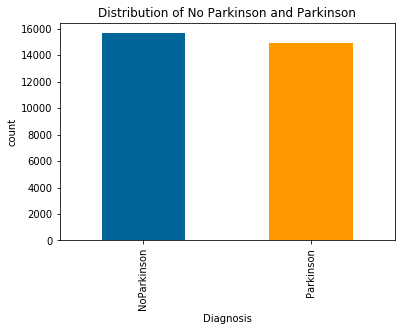

In [ ]:
count.plot(kind='bar',color=("#006699","#ff9900"))
plt.title("Distribution of No Parkinson and Parkinson")
plt.xlabel("Diagnosis")
plt.ylabel("count");

In [ ]:
data=data.drop(['audioId', 'recordId', 'healthCode', 'age'], axis=1)

In [ ]:
data = data.dropna(how='any',axis=0)

In [ ]:
y=data.lable.values #dependent variable
data=data.drop(["lable"], axis=1) #Independent variable


In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(data.values, y, 
                                                    test_size=0.20, 
                                                    
                                                    stratify=y)
lable = {'NoParkinson':0, 'Parkinson':1}

y_train = [lable[i] for i in y_train]
y_test = [lable[i] for i in y_test]


In [ ]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

###Logistic Regression

**Accuracy from cross validation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

logi = LogisticRegression(solver='liblinear')
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(logi, X_train, y_train, cv=kfold)
results.mean()

**Accuracy withiut cross validation**

In [ ]:
logiModel=logi.fit(X_train, y_train)
y_pred = logiModel.predict(X_test)

accuracy_score(y_test, y_pred)

0.7122772600948177

**Confusion Matrix**

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2275,  857],
       [ 903, 2082]])

**AUC**

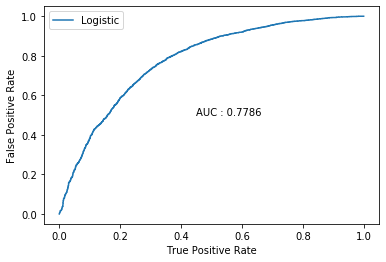

In [ ]:
pred=logiModel.predict_proba(X_test)[:,1]
auc=roc_auc_score(y_test, pred)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred)
plt.plot(lr_fpr, lr_tpr, marker='', label='Logistic')
plt.text(0.45, 0.5, 'AUC : '+str(np.round(auc,4)))
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

In [ ]:
result_table = result_table.append({'classifiers':'Logistic Regression',
                                        'fpr':lr_fpr, 
                                        'tpr':lr_tpr, 
                                        'auc':auc}, ignore_index=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      3132
           1       0.71      0.70      0.70      2985

    accuracy                           0.71      6117
   macro avg       0.71      0.71      0.71      6117
weighted avg       0.71      0.71      0.71      6117



### Decision Tree

**Accuracy from cross validation**

In [ ]:
from sklearn import tree
dTree = tree.DecisionTreeClassifier()
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(dTree, X_train, y_train, cv=kfold)
results.mean()


**Accuracy without cross validation**

In [ ]:
dTree = dTree.fit(X_train, y_train)
y_pred = dTree.predict(X_test)
accuracy_score(y_test, y_pred)

0.7459538989700834

**Confusion Matrix**

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2309,  823],
       [ 816, 2169]])

**AUC**

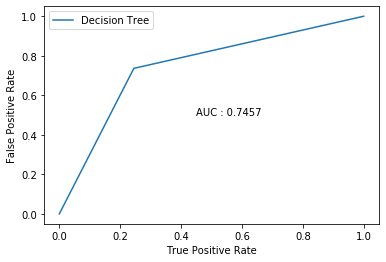

In [ ]:
pred=dTree.predict_proba(X_test)[:,1]
auc=roc_auc_score(y_test, pred)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred)
plt.plot(lr_fpr, lr_tpr, marker='', label='Decision Tree')
plt.text(0.45, 0.5, 'AUC : '+str(np.round(auc,4)))
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

In [ ]:
result_table = result_table.append({'classifiers':'Decision Tree',
                                        'fpr':lr_fpr, 
                                        'tpr':lr_tpr, 
                                        'auc':auc}, ignore_index=True)

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.74      0.74      3132
           1       0.72      0.73      0.73      2985

    accuracy                           0.73      6117
   macro avg       0.73      0.73      0.73      6117
weighted avg       0.73      0.73      0.73      6117



###SVM

**Accurecy from cross validation**

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',probability=True)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(svclassifier, X_train, y_train, cv=kfold)
results.mean()

**Accuracy withiut cross validation**

In [ ]:
svclassifier.fit(X_train, y_train)
y_pred=svclassifier.predict(X_test)
accuracy_score(y_test, y_pred)

**Confusion Matrix**

In [ ]:
confusion_matrix(y_test, y_pred)

**AUC**

In [ ]:
probas_ = svclassifier.predict_proba(X_test)[:,1]

In [ ]:
#pred=probas_[:, 1]
auc=roc_auc_score(y_test, probas_ )
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred)
plt.plot(lr_fpr, lr_tpr, marker='', label='SVM')
plt.text(0.45, 0.5, 'AUC : '+str(np.round(auc,4)))
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

### KNN (K-Nearst Neigbourhood)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7258460029426189

**Confusion Matrix**

In [ ]:
confusion_matrix(y_test, y_pred)

**AUC**

In [ ]:
probas_ = knn_model.predict_proba(X_test)

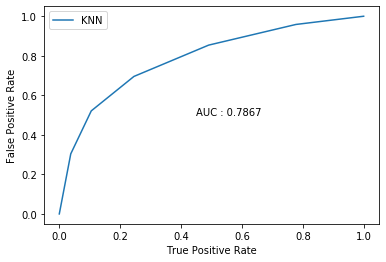

In [ ]:
pred=probas_[:, 1]
auc=roc_auc_score(y_test, pred)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred)
plt.plot(lr_fpr, lr_tpr, marker='', label='KNN')
plt.text(0.45, 0.5, 'AUC : '+str(np.round(auc,4)))
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

In [ ]:
result_table = result_table.append({'classifiers':'KNN',
                                        'fpr':lr_fpr, 
                                        'tpr':lr_tpr, 
                                        'auc':auc}, ignore_index=True)

In [ ]:
print(classification_report(y_test, y_pred))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randForest = RandomForestClassifier()
randForest_model = randForest.fit(X_train, y_train)
y_pred = randForest_model.predict(X_test)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8191924145823116

**Confusion Matrix**

In [ ]:
confusion_matrix(y_test, y_pred)

**AUC**

In [ ]:
probas_ =randForest_model.predict_proba(X_test)

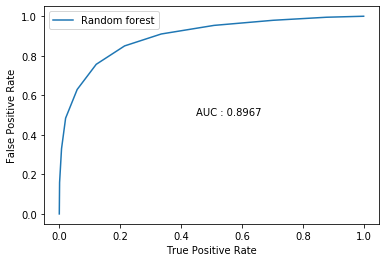

In [ ]:
pred=probas_[:, 1]
auc=roc_auc_score(y_test, pred)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred)
plt.plot(lr_fpr, lr_tpr, marker='', label='Random forest')
plt.text(0.45, 0.5, 'AUC : '+str(np.round(auc,4)))
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

In [ ]:
result_table = result_table.append({'classifiers':'Random Forest',
                                        'fpr':lr_fpr, 
                                        'tpr':lr_tpr, 
                                        'auc':auc}, ignore_index=True)

In [ ]:
print(classification_report(y_test, y_pred))

# Deep Learning

## H20

In [ ]:
pip install h2o

  Using cached https://files.pythonhosted.org/packages/6b/d1/aaa74df4716b2454d6034261807ef3855d014862c801f0e9b803b568006d/h2o-3.28.0.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/c9/dc/45cdef1b4d119eb96316b3117e6d5708a08029992b2fee2c143c7a0a5cc5/colorama-0.4.3-py2.py3-none-any.whl
  Created wheel for h2o: filename=h2o-3.28.0.1-py2.py3-none-any.whl size=123410554 sha256=76053dc4c197bee5f389940ebc0394eddd06ce9f53af67ddff72766766818969
  Stored in directory: /root/.cache/pip/wheels/ff/82/f4/3fe9c895b93c53b25ae44dc44aa54dad571c711f48bc485fe9
Successfully built h2o


In [ ]:
import h2o
import matplotlib.pyplot as plt
from h2o.grid.grid_search import H2OGridSearch
import pandas as pd
import numpy as np
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator
import os

In [ ]:
h2o.init(ip="127.0.0.1",max_mem_size_GB = 2)
h2o.connect()


Checking whether there is an H2O instance running at http://127.0.0.1:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.5" 2019-10-15; OpenJDK Runtime Environment (build 11.0.5+10-post-Ubuntu-0ubuntu1.118.04); OpenJDK 64-Bit Server VM (build 11.0.5+10-post-Ubuntu-0ubuntu1.118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpce4jts98
  JVM stdout: /tmp/tmpce4jts98/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpce4jts98/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.1
H2O cluster version age:,20 days
H2O cluster name:,H2O_from_python_unknownUser_fhd33k
H2O cluster total nodes:,1
H2O cluster free memory:,2 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


Connecting to H2O server at http://localhost:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.1
H2O cluster version age:,20 days
H2O cluster name:,H2O_from_python_unknownUser_fhd33k
H2O cluster total nodes:,1
H2O cluster free memory:,2 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"


<H2OConnection to http://localhost:54321, no session>

In [ ]:
dataCheck_df = h2o.import_file(path = os.path.realpath("../content/dataCheck.csv"))

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
#split the data as described above
train, valid,test = dataCheck_df.split_frame([0.6, 0.2], seed=1234)

X = dataCheck_df.col_names[5:]
y = dataCheck_df.col_names[0]

###H2O Model

In [ ]:
model= H2ODeepLearningEstimator(
    hidden=[50,190,150],
    activation = "tanh", 
    epochs = 10,
    distribution="bernoulli",
    loss='CrossEntropy',
    nfolds=10,
    l2=0,
    l1=0,
    mini_batch_size=1)
model.train(X, y, training_frame = train, validation_frame = valid)

In [ ]:
model.get_params()

In [ ]:
model.accuracy()

In [ ]:
lr_fpr=model.model_performance(test).fprs
lr_tpr=model.model_performance(test).tprs
auc=model.model_performance(test).auc()
result_table = result_table.append({'classifiers':'Deep Neural Network H2O',
                                        'fpr':lr_fpr, 
                                        'tpr':lr_tpr, 
                                        'auc':auc}, ignore_index=True)

In [ ]:
modelPerform=model.model_performance(test)

In [ ]:
modelPerform.confusion_matrix()

In [ ]:
 modelPerform.accuracy()

**Plot**

In [ ]:
model.plot()

In [ ]:
model_hist = model.score_history()

In [ ]:
plt.plot( model_hist['epochs'],model_hist['training_classification_error']  ,label="training_classification_error" )
plt.plot( model_hist['epochs'],model_hist['validation_classification_error'] ,label="validation_classification_error"   )
plt.xlabel('Epochs')
plt.ylabel('classification_error')
plt.legend();

###Grid Search

In [ ]:
hyper_params = {'activation': ['tanh', 'rectifier', 'RectifierWithDropout'],
                'hidden': [ [50,50], [50,50,50]],
                'l1': [0, 1e-3, 1e-5],
                'l2': [0, 1e-3, 1e-5]}
# Set up DNN grid search
# Add a seed for reproducibility
dnn_rand_grid = H2OGridSearch(
                    H2ODeepLearningEstimator(
                        model_id = 'dnn_rand_grid', 
                        seed = 1234,
                        epochs = 20,   
                        nfolds = 5,
                        fold_assignment = "Modulo",                
                        keep_cross_validation_predictions = True),  
                        hyper_params = hyper_params)
# Use .train() to start the grid search
dnn_rand_grid.train(covtype_X, covtype_y, training_frame = train, validation_frame = valid)
dnn_rand_grid_sorted = dnn_rand_grid.get_grid(sort_by='mse', decreasing=False)
# Extract the best model from random grid search
best_dnn_model_id = dnn_rand_grid_sorted.model_ids[0]
best_dnn_from_rand_grid = h2o.get_model(best_dnn_model_id)

In [ ]:
best_dnn_from_rand_grid.get_params

In [ ]:
bb=best_dnn_from_rand_grid.model_performance(test)

In [ ]:
bb.accuracy()

### H2O Model Evaluation

In [ ]:
h2o.save_model(model=model, force=True)

In [ ]:
saved_model = h2o.load_model('/content/DNNH2OModel')

In [ ]:
saved_model.get_params

In [ ]:
testPerformance=saved_model.model_performance(test)

In [ ]:
testPerformance.plot()

In [ ]:
testPerformance.accuracy()

In [ ]:
testPerformance.auc()

In [ ]:
testPerformance.confusion_matrix()

## ANN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten,AveragePooling1D, AveragePooling2D,MaxPooling2D,GlobalMaxPool2D,Conv1D, Dropout, Flatten, MaxPooling1D,GlobalMaxPool1D
from keras.models import model_from_json
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
%load_ext tensorboard
import datetime
!rm -rf ./logs/ 


Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X_scale = min_max_scaler.fit_transform(data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3)

In [ ]:
lable = {'NoParkinson':0, 'Parkinson':1}

y_train = [lable[i] for i in y_train]
y_test = [lable[i] for i in y_test]

In [ ]:
import keras.backend as K
K.clear_session()
model = Sequential()
model.add(Dense(42, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(250, activation='relu'))
model.add(Dense(350, activation='relu'))
model.add(Dense(450, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy',metrics=['accuracy','binary_crossentropy'])

In [ ]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
model.fit(x=X_train,y= y_train, validation_split=0.3, callbacks=[tensorboard_callback],epochs=100)

Train on 14985 samples, validate on 6423 samples
Epoch 1/100
14985/14985 [==============================] - 2s 118us/step - loss: 0.0919 - acc: 0.9672 - binary_crossentropy: 0.0919 - val_loss: 0.4895 - val_acc: 0.8622 - val_binary_crossentropy: 0.4895
Epoch 2/100
14985/14985 [==============================] - 2s 124us/step - loss: 0.1077 - acc: 0.9610 - binary_crossentropy: 0.1077 - val_loss: 0.4810 - val_acc: 0.8583 - val_binary_crossentropy: 0.4810
Epoch 3/100
14985/14985 [==============================] - 2s 123us/step - loss: 0.0813 - acc: 0.9726 - binary_crossentropy: 0.0813 - val_loss: 0.5736 - val_acc: 0.8501 - val_binary_crossentropy: 0.5736
Epoch 4/100
14985/14985 [==============================] - 2s 119us/step - loss: 0.0794 - acc: 0.9728 - binary_crossentropy: 0.0794 - val_loss: 1.4435 - val_acc: 0.7369 - val_binary_crossentropy: 1.4435
Epoch 5/100
14985/14985 [==============================] - 2s 121us/step - loss: 0.0904 - acc: 0.9662 - binary_crossentropy: 0.0904 - val_l

In [ ]:
test_y_predictions = model.predict_classes(X_test)

In [ ]:
accuracy_score(y_test, test_y_predictions)

0.8690061028770706

In [ ]:
confusion_matrix(y_test,test_y_predictions)

array([[4057,  678],
       [ 524, 3917]])

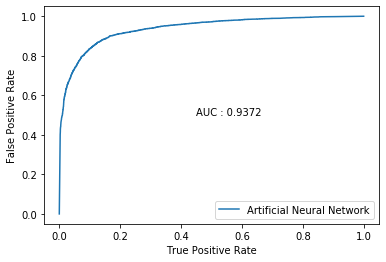

In [ ]:
auc=roc_auc_score(y_test, model.predict(X_test))
lr_fpr, lr_tpr, _ = roc_curve(y_test,  model.predict(X_test))
plt.plot(lr_fpr, lr_tpr, marker='', label='Artificial Neural Network')
plt.text(0.45, 0.5, 'AUC : '+str(np.round(auc,4)))
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

In [ ]:
result_table = result_table.append({'classifiers':'Artificial Neural Network',
                                        'fpr':lr_fpr, 
                                        'tpr':lr_tpr, 
                                        'auc':auc}, ignore_index=True)

In [ ]:
model.save('ANNModel.h5')

In [ ]:
%tensorboard --logdir logs

##CNN On Mel Scale images

**Model Building**

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X_scale = min_max_scaler.fit_transform(data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3)

In [ ]:
lable = {'NoParkinson':0, 'Parkinson':1}

y_train = [lable[i] for i in y_train]
y_test = [lable[i] for i in y_test]

In [ ]:
X_train=X_train.reshape(X_train.shape[0], 42,1)
X_test=X_test.reshape(X_test.shape[0], 42,1)

In [ ]:
model = Sequential()
model.add(Conv1D(32, kernel_size=(10), activation='tanh', input_shape=(42,1)))
model.add(Conv1D(64, kernel_size=(10), activation='tanh'))
model.add(AveragePooling1D(pool_size=(3)))


model.add(Flatten())
model.add(Dense(150, activation='tanh'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 33, 32)            352       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 24, 64)            20544     
_________________________________________________________________
average_pooling1d_1 (Average (None, 8, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               76950     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 151       
Total params: 97,997
Trainable params: 97,997
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=400, validation_split=0.2)

Train on 17126 samples, validate on 4282 samples
Epoch 1/400
17126/17126 [==============================] - 2s 119us/sample - loss: 0.2674 - acc: 0.8914 - val_loss: 0.3862 - val_acc: 0.8356
Epoch 2/400
17126/17126 [==============================] - 2s 107us/sample - loss: 0.2661 - acc: 0.8937 - val_loss: 0.4995 - val_acc: 0.8001
Epoch 3/400
17126/17126 [==============================] - 2s 118us/sample - loss: 0.2647 - acc: 0.8911 - val_loss: 0.4281 - val_acc: 0.8272
Epoch 4/400
17126/17126 [==============================] - 2s 107us/sample - loss: 0.2647 - acc: 0.8910 - val_loss: 0.3533 - val_acc: 0.8515
Epoch 5/400
17126/17126 [==============================] - 2s 108us/sample - loss: 0.2648 - acc: 0.8927 - val_loss: 0.5596 - val_acc: 0.7536
Epoch 6/400
17126/17126 [==============================] - 2s 110us/sample - loss: 0.2638 - acc: 0.8919 - val_loss: 0.8622 - val_acc: 0.7022
Epoch 7/400
 9856/17126 [================>.............] - ETA: 0s - loss: 0.2600 - acc: 0.8945

KeyboardInterrupt: ignored

In [ ]:
test_y_predictions = model.predict_classes(X_test)

In [ ]:
confusion_matrix(y_test,test_y_predictions)

array([[4271,  400],
       [ 966, 3539]])

In [ ]:
accuracy_score(y_test, test_y_predictions)

0.8511333914559721

In [ ]:
model.save('CNNModel1.h5')

In [ ]:
model = tf.keras.models.load_model('CNNModel1.h5')


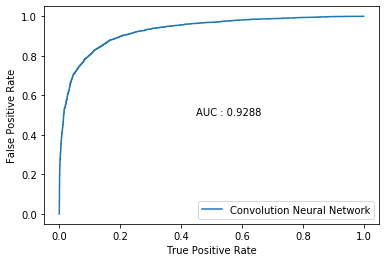

In [ ]:
auc=roc_auc_score(y_test, model.predict(X_test))
lr_fpr, lr_tpr, _ = roc_curve(y_test,  model.predict(X_test))
plt.plot(lr_fpr, lr_tpr, marker='', label='Convolution Neural Network')
plt.text(0.45, 0.5, 'AUC : '+str(np.round(auc,4)))
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

In [ ]:
result_table = result_table.append({'classifiers':'Convolution Neural Network',
                                        'fpr':lr_fpr, 
                                        'tpr':lr_tpr, 
                                        'auc':auc}, ignore_index=True)

# Visualization

**ROC**

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format( result_table.loc[i]['classifiers'], result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('Rectifer ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()

,classifiers,fpr,tpr,auc
0,Logistic Regression,"[0.0, 0.0, 0.0, 0.00031928480204342275, 0.0003...","[0.0, 0.00033500837520938025, 0.00134003350083...",0.778552
1,Decision Tree,"[0.0, 0.24489144316730524, 1.0]","[0.0, 0.7363484087102178, 1.0]",0.745728
2,KNN,"[0.0, 0.037675606641123884, 0.1050446998722860...","[0.0, 0.30385259631490785, 0.5212730318257957,...",0.786747
3,Random Forest,"[0.0, 0.0009578544061302681, 0.007343550446998...","[0.0, 0.15879396984924624, 0.32964824120603015...",0.896712
4,Deep Neural Network H2O,"[0.00032289312237649337, 0.0006457862447529867...","[0.0925862658011616, 0.18004783054321832, 0.24...",0.933203
5,Artificial Neural Network,"[0.0, 0.0023231256599788807, 0.002323125659978...","[0.0, 0.34001351047061473, 0.35419950461607747...",0.937155
6,Convolution Neural Network,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.000214086919289231...","[0.0, 0.00022197558268590456, 0.00066592674805...",0.928833


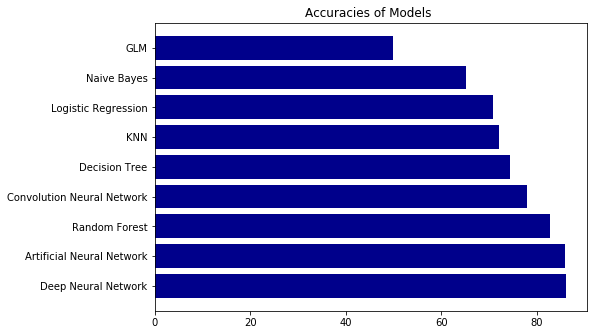

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Deep Neural Network','Artificial Neural Network','Random Forest', 'Convolution Neural Network','Decision Tree', 'KNN','Logistic Regression','Naive Bayes','GLM']
students = [86.12,86,82.67,78,74.39,72.07,70.91,65.19,50.01]
ax.barh(langs,students,color='darkblue')
plt.title('Accuracies of Models ')
#plt.bar(range(len(students)), students, )
plt.show()

In [ ]:
 Py, sr = librosa.load("/content/drive/My Drive/AudioFile/Audio5612135.wav")

In [ ]:
 NPy, sr = librosa.load("/content/drive/My Drive/AudioFile/Audio5463488.wav")

In [ ]:
D = np.abs(librosa.stft(Py))

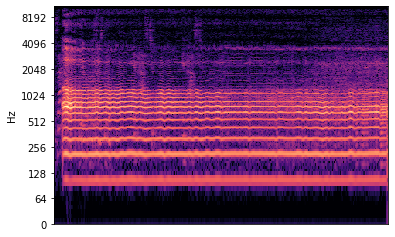

Text(0.5, 1.0, 'Parkinson Patient')

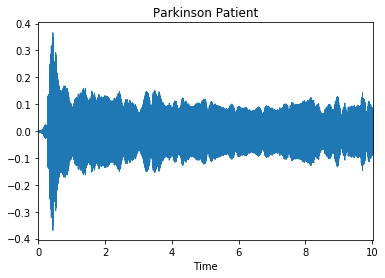

In [ ]:
#Plot the amplitude envelope of a waveform.
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
librosa.display.waveplot(Py,sr)
plt.title('Parkinson Patient')
plt.subplot(2, 1, 2)
librosa.display.waveplot(NPy,sr)
plt.title('Healthy Person')
plt.tight_layout()
plt.show()

In [ ]:
plt.subplot(2, 1,1)
Pspec = librosa.feature.melspectrogram(Py, sr=sr)
librosa.display.specshow(Pspec,y_axis='mel', x_axis='s', sr=sr)
plt.title('Melspectrogram of Parkinson Patient')
plt.colorbar()
plt.subplot(2,1,2)

NPspec = librosa.feature.melspectrogram(NPy, sr=sr)
librosa.display.specshow(NPspec,y_axis='mel', x_axis='s', sr=sr)
plt.colorbar()
plt.title('Melspectrogram of Non Parkinson')
plt.tight_layout()
plt.show()

In [ ]:
plt.subplot(2, 1,1)
Pspec = librosa.feature.melspectrogram(Py, sr=sr)
db_spec = librosa.power_to_db(Pspec, ref=np.max,)
librosa.display.specshow(db_spec,y_axis='mel', x_axis='s', sr=sr)
plt.title(' Spectrogram of Parkinson')
plt.colorbar();
plt.subplot(2, 1,2)
db_spec = librosa.power_to_db(NPspec, ref=np.max,)
librosa.display.specshow(db_spec,y_axis='mel', x_axis='s', sr=sr)
plt.title('Power Spectrogram of Non Parkinson')
plt.colorbar();
plt.tight_layout()
plt.show()

NameError: ignored

In [ ]:
plt.subplot(2, 1,1)
Tgram = librosa.feature.tempogram(Py, sr=sr)
librosa.display.specshow(Tgram, x_axis='time', y_axis='tempo')
plt.colorbar()
plt.title('Tempogram of Parkinson')
plt.subplot(2,1,2)
Tgram = librosa.feature.tempogram(NPy, sr=sr)
librosa.display.specshow(Tgram, x_axis='time', y_axis='tempo')
plt.colorbar()
plt.title('Tempogram of Non Parkinson')
plt.tight_layout()
plt.show()

In [ ]:
plt.subplot(2, 1,1)
chroma = librosa.feature.chroma_cqt(Py, sr=sr)
#plt.figure(figsize=(8,3))
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
plt.title('Chromagram of Parkinson')
plt.colorbar()
plt.subplot(2, 1,2)
chroma = librosa.feature.chroma_cqt(NPy, sr=sr)
#plt.figure(figsize=(8,3))
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
plt.title('Chromagram of Non Parkinson')
plt.colorbar()

plt.tight_layout()
plt.show()

In [ ]:
plt.subplot(2, 1, 1)
rms=librosa.feature.rmse(y=Py)
plt.semilogy(rms.T, label='RMS Energy of Parkinson Patient')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend(loc='best')
plt.subplot(2, 1,2)
rms=librosa.feature.rmse(y=NPy)
plt.semilogy(rms.T, label='RMS Energy of Healthy Person')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
chromagram = librosa.feature.chroma_stft(NPy, sr=sr,hop_length=512)
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512)

In [ ]:
chromagram = librosa.feature.chroma_stft(Py, sr=sr,hop_length=512)
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512)